<a href="https://colab.research.google.com/github/diegonavarroo/Diego-Navarro-Gomez/blob/main/2do_Poyecto_Clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


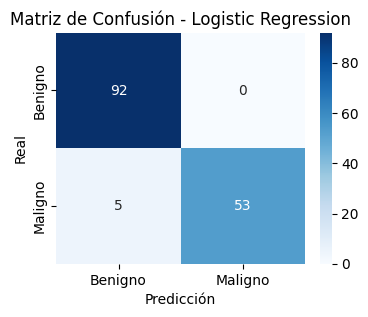


Modelo: Logistic Regression
Precisión: 0.9667
Puntaje F1: 0.9550


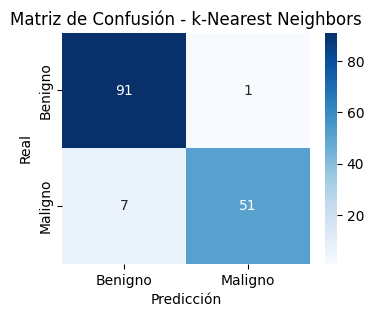


Modelo: k-Nearest Neighbors
Precisión: 0.9467
Puntaje F1: 0.9273


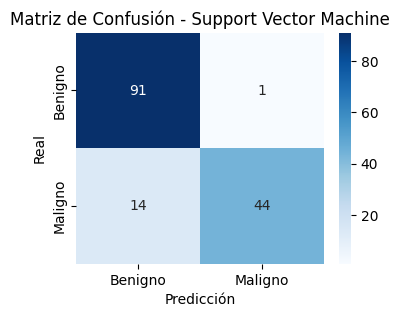


Modelo: Support Vector Machine
Precisión: 0.9000
Puntaje F1: 0.8544


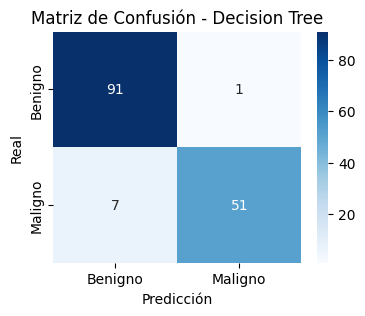


Modelo: Decision Tree
Precisión: 0.9467
Puntaje F1: 0.9273


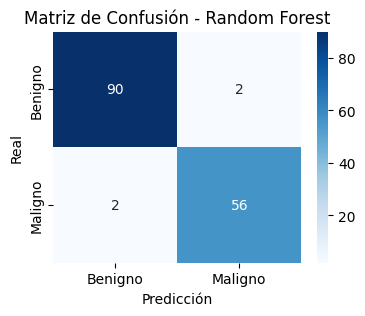


Modelo: Random Forest
Precisión: 0.9733
Puntaje F1: 0.9655


In [ ]:
# 1. Importar bibliotecas necesarias
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar el Google Drive
drive.mount('/content/drive')

# 3. Función para cargar y preprocesar los datos
def cargar_datos(ruta_archivo):
    """
    Carga un archivo CSV y realiza el preprocesamiento necesario para los datos.

    Argumentos:
        ruta_archivo (str): Ruta al archivo CSV.

    Devuelve:
        tupla: Una tupla con las características (features) y etiquetas (labels).
    """
    try:
        # Cargar los datos desde el archivo CSV
        data = pd.read_csv(ruta_archivo)

        # Si existe la columna 'id', se elimina ya que no aporta informacion al modelo
        if 'id' in data.columns:
            data = data.drop(columns=['id'])

        # Convertir las etiquetas ('M', 'B') a valores numéricos (1, 0)
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

        ## Separar las características (features) y etiquetas (labels)
        features = data.drop(columns=['diagnosis'])
        labels = data['diagnosis']

        return features, labels
    except Exception as e:
        # Captura errores si ocurre algún problema al cargar el archivo
        print(f"Error al cargar los datos: {e}")
        return None, None

# 4. Función para dividir los datos
def dividir_datos(features, labels):
    """
    Divide los datos en conjuntos de entrenamiento y prueba.

    Argumentos:
        features : Características.
        labels: Etiquetas.

    Devuelve:
        tupla: Conjuntos divididos (train_features, test_features, train_labels, test_labels).

    Nota:
    - Dividimos el conjunto de datos en 70% para entrenamiento y 30% para prueba
    - `stratify` mantiene la proporción de clases en ambos conjuntos.
    - `random_state=20` asegura resultados consistentes.
    - El valor 20 es aleatorio y no afecta el aprendizaje.

    """
    return train_test_split(features, labels, test_size=0.3, random_state=20, stratify=labels)

# 5. Función para inicializar modelos
def inicializar_modelos():
    """
    Inicializa los clasificadores requeridos.

    Devuelve:
        dict: Diccionario con los modelos y sus respectivas configuraciones.
    """
    return {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=20),
        'k-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(probability=True, random_state=20),
        'Decision Tree': DecisionTreeClassifier(random_state=20),
        'Random Forest': RandomForestClassifier(random_state=20)
    }

# 6. Función para entrenar y evaluar modelos
def entrenar_evaluar_modelos(modelos, train_features, test_features, train_labels, test_labels):
    """
    Entrena y evalúa los modelos del diccionario.

    Argumentos:
        modelos: Diccionario con los clasificadores.
        train_features: Características para entrenamiento.
        test_features: Características para prueba.
        train_labels: Etiquetas para entrenamiento.
        test_labels: Etiquetas para prueba.

    Devuelve:
        dict: Diccionario con las métricas de evaluación de cada modelo.

    Nota:
    -Métricas calculadas: Accuracy, F1 Score, Confusion Matrix.
    -Estas son calculadas para cada modelo y despues llevadas a un diccionario.
    """
    resultados = {}
    for nombre, modelo in modelos.items():
        try:
            # Entrenamos el modelo
            modelo.fit(train_features, train_labels)

            # Generamos predicciones
            predicted_labels = modelo.predict(test_features)

            # Calculamos métricas
            resultados[nombre] = {
                'Accuracy': accuracy_score(test_labels, predicted_labels),
                'F1 Score': f1_score(test_labels, predicted_labels),
                'Confusion Matrix': confusion_matrix(test_labels, predicted_labels)
            }
        except Exception as e:
            # Capturamos errores específicos de cada modelo durante el entrenamiento o la predicción
            print(f"Error al entrenar o evaluar {nombre}: {e}")
    return resultados

# 7. Función para graficar matriz de confusión
def graficar_matriz_confusion(matriz, titulo):
    """
    Genera un gráfico de la matriz de confusión.

    Argumentos:
        matriz: Matriz de confusión.
        titulo: Título del gráfico.

    Nota:
    - Utiliza Matplotlib para generar el gráfico.
    - Utiliza Seaborn para generar el mapa de calor.
    - Los valores en la matriz se muestran sobre el gráfico.
    """

    plt.figure(figsize=(4,3))
    sns.heatmap(
        matriz,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Benigno', 'Maligno'],
        yticklabels=['Benigno', 'Maligno']
    )
    plt.title(f'Matriz de Confusión - {titulo}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# 8. Bloque principal
if __name__ == "__main__":

    # Ruta del archivo desde Google Drive
    ruta_archivo = "/content/drive/MyDrive/cancer (1).csv"

    # Cargar los datos desde el archivo CSV
    features, labels = cargar_datos(ruta_archivo)
    if features is not None and labels is not None:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        train_features, test_features, train_labels, test_labels = dividir_datos(features, labels)

        # Inicializar modelos
        modelos = inicializar_modelos()

        # Entrenar y evaluar los modelos
        resultados = entrenar_evaluar_modelos(modelos, train_features, test_features, train_labels, test_labels)

# Mostrar resultados para cada modelo
for nombre, metricas in resultados.items():
    # Graficar la matriz
    graficar_matriz_confusion(metricas['Confusion Matrix'], titulo=nombre)

    # Imprimir las métricas después de la gráfica
    print(f"\nModelo: {nombre}")
    print(f"Precisión: {metricas['Accuracy']:.4f}")
    print(f"Puntaje F1: {metricas['F1 Score']:.4f}")

